In [3]:
import cv2
import matplotlib.pyplot as plt

In [2]:
im = cv2.imread('/mnt/data/scans/AI scans/Cytokeratin_mask_registered/1/h0.png')

In [5]:
thumb = cv2.resize(im,(512,512))

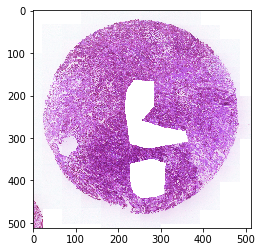

In [8]:
plt.imshow(thumb)

In [20]:
from skimage import color, filters, morphology
from PIL import Image

def create_bg_mask(im):
    slide_hsv = color.rgb2hsv(im)
    saturation = slide_hsv[:, :, 1]
    threshold = filters.threshold_otsu(saturation)
    high_saturation = (saturation > threshold)
    disk_object = morphology.disk(10)
    mask = morphology.closing(high_saturation, disk_object)
    mask = morphology.opening(mask, disk_object)
    return Image.fromarray(mask)

In [ ]:
bg_im = create_bg_mask(im)

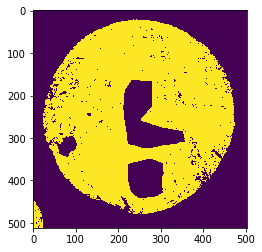

In [29]:
bg_im.thumbnail((512,512))
plt.imshow(bg_im)

In [9]:
im2 = cv2.imread('/mnt/data/scans/AI scans/Cytokeratin_mask_registered/1/mask_0.png')
thumb2 = cv2.resize(im2, (512,512))

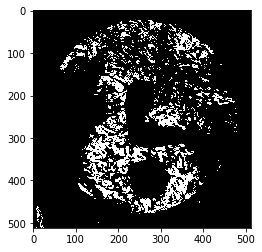

In [10]:
plt.imshow(thumb2)